# Computational Drug Discovery in *Mycobacterium tuberculosis*

###Project by Murrel Saldanha

###Derived from code from [Data Professor](https://github.com/dataprofessor/code/blob/master/python/CDD_ML_Part_1_Acetylcholinesterase_Bioactivity_Data_Concised.ipynb//) 


---



#Introduction

###Tuberculosis caused by the elusive Mycobacterium tuberculosis is responsible for 10 million cases and 1.5 million deaths around the world making it one of the deadliest pathogens known to man. Patient symptoms include persistent cough, chest pain, weakness and fatigue with around 25% of the world population carrying the bacteria but only 5-15% manifesting the disease and its symptoms [WHO 2020 Report](https://www.who.int/health-topics/tuberculosis). 


###The BCG vaccine is known to have an efficacy of only 50% and the drugs currently available require long dosage periods, have multiple side effects and presence of multidrug and total drug resistant strains have rendered most of them ineffective ([Colditz et al](https://jamanetwork.com/journals/jama/article-abstract/366365)). MDR strains or multi-drug resistant strains are those that are resistant to first line agents- Isoniazid (INH) and Rifampicin (RIF) and XDR strains are extensively resistant strains that are not only MDR are also resistant to any fluoroquinolone and to at least one of the injectable second-line drugs: kanamycin, capreomycin or amikacin ( [Zhang et al.](https://onlinelibrary.wiley.com/doi/abs/10.1128/9781555817657.ch8)). Moreover, total drug resistant strains are those that show resistance to almost all laboratory strains tested are emerging all over the world, especially in TB endemic regions (World Health Organization (2010). Treatment of Tuberculosis: Guidelines. Geneva.).




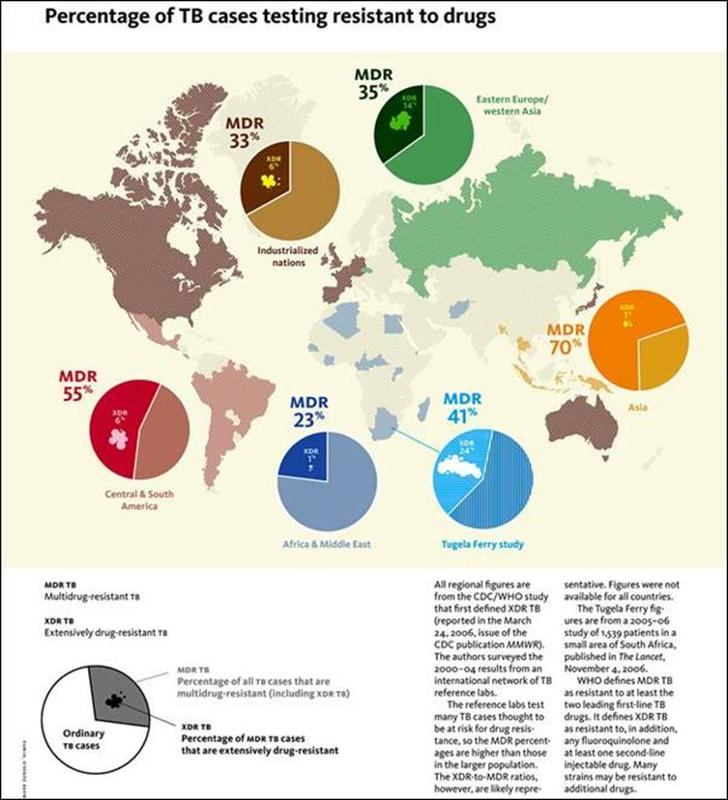
###*Img 1. The image above respresents epidemiology of drug resistant strains in the world. (Yale Alumni Magazine, 2010)*




###Drug discovery is a long and arduous process that takes decades to bring a new lead compound from bench to bedside. New effective drugs become increasingly important with rising antibiotic resistant strains. The goal of this project is to provide a bioinformatic tool to aid in discovering a potent drug molecule against a protein of interest using the ChEMBL database. The project will report the Lipinski descriptors of all target compounds and using these descriptors identify and classify the active from molecules with high statistical significance.




### The mycolyl-arabinogalactan-peptidoglycan (mAGP) complex represents the cell wall core structure that is a unique distinguishing feature of the Mycobacterial bacilli. Our protein of interest, the 3-oxoacyl-[acyl-carrier-protein] synthase III catalyzes the condensation reaction of fatty acid synthesis by the addition to an acyl acceptor of two carbons from malonyl-ACP. It catalyzes the first condensation reaction which initiates fatty acid synthesis and may therefore play a role in governing the total rate of fatty acid production. Its substrate specificity is critical for the biosynthesis of mycolic acid fatty acid chain and it presents itself as an attractive protein to target for identifying new drug molecules. (National Center for Biotechnology Information (2022) https://pubchem.ncbi.nlm.nih.gov/protein/P9WNG3., Scarsdale et. al.)



# Methodology

###The ChEMBL database is our main source of list of potential drug compounds against the target molecule. This database has been accessed via the official ChEMBL websource client. Query searches can be screened specifically for accessing all target proteins listed for *Mycobacterium tuberculosis*. We then identify ChEMBL ID of our protein of interest and retrieve bioactivity data filtering searches to keep only those molecules that have a reported IC50. IC50 is the half maximally inhibitory concentration of the drug that is a standard in determining potency of drug moleclues. 

###The drug molecules are classified into active, inactive and intermediate based on their IC50. These values can be adjusted based on the determined IC50 threshold for active compounds. In our case study, compounds that have IC50 less than 1000nM is considered to have a bioactive IC50. Then a new dataframe was made with the canonical smiles, bioactivity and IC50 values giving us a list of potential drug targets. We then list the Lipinski discriptors for each molecule which consist of the molecular weight, IC50, LogP, Number of H donors and number of H acceptors. IC50 values go upto 10^-9 M and have large variation. To normalize values we convert IC50 to pIC50 and eleminate compounds with intermediate IC50 from our dataframe to simplify further analysis.

###Exploratory data analysis in the chemical space is performed in the next part. The discriptors are plotted to analyse features of each discriptor corresponding to the active and inactive compounds. We then perform the Mann-Whitney U test to determine statistic significance of bioactivity in active compounds. The test is repeated for each individual discriptor to see if individual discriptors also significantly contribute to activity. This excerxise finally gives us a list of compounds that should show activity against 3-oxoacyl-[acyl-carrier-protein] synthase III based on its lipinski discriptors

#Part 1) Compiling dataset of target compounds

## Install Libraries

The ChEMBL websource client is developed by the ChEMBL group and allows users to directly access all of ChEMBL data and cheminformatic using python.(Davies M, Nowotka M, Papadatos G, Dedman N, Gaulton A, Atkinson F, Bellis L, Overington JP. (2015) 'ChEMBL web services: streamlining access to drug discovery data and utilities.' Nucleic Acids Res., 43(W1) W612-W620.)

In [ ]:
!pip install chembl_webresource_client 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached chembl_webresource_client-0.10.8-py3-none-any.whl (55 kB)
  Using cached requests_cache-0.7.5-py3-none-any.whl (39 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
     |████████████████████████████████| 596 kB 33.3 MB/s 
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6349 sha256=36edd51350d37fe04af048370fd64581c066a5b9e21abf58037714f4800edd89
  Stored in directory: /root/.cache/pip/wheels/88/96/68/c2be18e7406804be2e593e1c37845f2dd20ac2ce1381ce40b0
Successfully built easydict


##Import Libraries

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client #Import necessary libraries

##Search for target protein

The target.search code performs a web search on the ChEMBL database based on query *Mycobacterium tuberculosis* under targets section

In [ ]:
target = new_client.target # Assign new client to target variable
targets = target.search('Mycobacterium tuberculosis')
targets = pd.DataFrame.from_dict(targets)
targets     # Display targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mycobacterium tuberculosis,Mycobacterium tuberculosis,27.0,False,CHEMBL360,[],ORGANISM,1773
1,[],Mycobacterium tuberculosis H37Rv,Mycobacterium tuberculosis H37Rv,24.0,False,CHEMBL2111188,[],ORGANISM,83332
2,[],Mycobacterium tuberculosis H37Ra,Mycobacterium tuberculosis H37Ra,24.0,False,CHEMBL2366634,[],ORGANISM,419947
3,[],Mycobacterium,Mycobacterium,13.0,True,CHEMBL614981,[],ORGANISM,1763
4,[],Mycobacterium tuberculosis,PYRAZINAMIDASE/NICOTINAMIDAS PNCA (PZase),13.0,False,CHEMBL1697663,"[{'accession': 'Q50575', 'component_descriptio...",SINGLE PROTEIN,1773
...,...,...,...,...,...,...,...,...,...
117,[],Mycobacterium tuberculosis,70S ribosome,7.0,False,CHEMBL2363965,"[{'accession': 'P9WHE1', 'component_descriptio...",PROTEIN NUCLEIC-ACID COMPLEX,1773
118,[],Mycobacterium tuberculosis,ATP synthase,7.0,False,CHEMBL2364166,"[{'accession': 'P9WPU9', 'component_descriptio...",PROTEIN COMPLEX,1773
119,[],Mycobacterium tuberculosis,Thioredoxin reductase,7.0,False,CHEMBL2390811,"[{'accession': 'P9WHH1', 'component_descriptio...",SINGLE PROTEIN,1773
120,[],Mycobacterium tuberculosis,ATP-dependent Clp protease ATP-binding subunit...,7.0,False,CHEMBL4630874,"[{'accession': 'P9WPC9', 'component_descriptio...",SINGLE PROTEIN,1773


##Select and retrieve bioactivity data for *Mycobacterium tuberculosis* 3-oxoacyl-[acyl-carrier-protein] synthase III

In [ ]:
filtered_data = targets[targets["pref_name"] == "3-oxoacyl-[acyl-carrier-protein] synthase III"] # To identidy serial number of target protein
print(filtered_data)
selected_target = targets.target_chembl_id[53] # Selected target variable stores ChEMBL ID of protein of interest
selected_target

                                     cross_references  \
53  [{'xref_id': 'P0A574', 'xref_name': None, 'xre...   

                      organism                                      pref_name  \
53  Mycobacterium tuberculosis  3-oxoacyl-[acyl-carrier-protein] synthase III   

    score  species_group_flag target_chembl_id  \
53    7.0               False       CHEMBL3640   

                                    target_components     target_type  tax_id  
53  [{'accession': 'P9WNG3', 'component_descriptio...  SINGLE PROTEIN    1773  


'CHEMBL3640'

In [ ]:
# Retrieve only bioactivity data 3-oxoacyl-[acyl-carrier-protein] synthase III that are reported as IC50 values in nM (nanomolar) unit.
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50") # Retrieve the bioactivity for our target variable 
                                                                                        #and filter for standard type to be only IC50 and no other classification
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,672002,[],CHEMBL648364,In vitro inhibitory activity against the recom...,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,uM,UO_0000065,None,500.0
1,None,674666,[],CHEMBL648364,In vitro inhibitory activity against the recom...,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,uM,UO_0000065,None,263.0
2,None,674667,[],CHEMBL648364,In vitro inhibitory activity against the recom...,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,uM,UO_0000065,None,119.0
3,None,677317,[],CHEMBL648364,In vitro inhibitory activity against the recom...,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,uM,UO_0000065,None,52.0
4,None,678602,[],CHEMBL648364,In vitro inhibitory activity against the recom...,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,uM,UO_0000065,None,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,None,2587263,[],CHEMBL1010089,Inhibition of Mycobacterium tuberculosis FabH,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,nM,UO_0000065,None,34.4
130,None,2587264,[],CHEMBL1010089,Inhibition of Mycobacterium tuberculosis FabH,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,nM,UO_0000065,None,31.4
131,None,2587265,[],CHEMBL1010089,Inhibition of Mycobacterium tuberculosis FabH,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,nM,UO_0000065,None,138.1
132,None,2587266,[],CHEMBL1010089,Inhibition of Mycobacterium tuberculosis FabH,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,nM,UO_0000065,None,1.99


##Handel missing data

In [ ]:
df2 = df[df.standard_value.notna()] # Drop compounds that do not have IC50 reported
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,672002,[],CHEMBL648364,In vitro inhibitory activity against the recom...,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,uM,UO_0000065,None,500.0
1,None,674666,[],CHEMBL648364,In vitro inhibitory activity against the recom...,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,uM,UO_0000065,None,263.0
2,None,674667,[],CHEMBL648364,In vitro inhibitory activity against the recom...,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,uM,UO_0000065,None,119.0
3,None,677317,[],CHEMBL648364,In vitro inhibitory activity against the recom...,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,uM,UO_0000065,None,52.0
4,None,678602,[],CHEMBL648364,In vitro inhibitory activity against the recom...,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,uM,UO_0000065,None,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,None,2587263,[],CHEMBL1010089,Inhibition of Mycobacterium tuberculosis FabH,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,nM,UO_0000065,None,34.4
130,None,2587264,[],CHEMBL1010089,Inhibition of Mycobacterium tuberculosis FabH,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,nM,UO_0000065,None,31.4
131,None,2587265,[],CHEMBL1010089,Inhibition of Mycobacterium tuberculosis FabH,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,nM,UO_0000065,None,138.1
132,None,2587266,[],CHEMBL1010089,Inhibition of Mycobacterium tuberculosis FabH,B,None,None,BAO_0000190,BAO_0000357,...,Mycobacterium tuberculosis,3-oxoacyl-[acyl-carrier-protein] synthase III,1773,None,None,IC50,nM,UO_0000065,None,1.99


# Data pre-processing

##Labeling compounds as active or inactive

Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate. (Lower IC50 indicates higher potency and lesser side effects. Values chosen here are not absolute and can be adjusted depending on decided threshold IC50 value).

In [ ]:
bioactivity_class = []
counter = 0
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) < 1000:
    bioactivity_class.append("active")
    counter += 1
  else:
    bioactivity_class.append("intermediate")
print(counter) # Check how many active compounds we have out of 133

14


## Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL123184,COc1cccc(CC2(C)SC(O)=C(C)C2=O)c1,500000.0
1,CHEMBL122699,CC1=C(O)C(C)(Cc2cc(F)cc(F)c2)SC1=O,263000.0
2,CHEMBL124117,CC(=O)Nc1cccc(-c2ccc(CC3(C)SC(O)=C(C)C3=O)cc2)c1,119000.0
3,CHEMBL332364,CC1=C(O)C(C)(Cc2cccc(Oc3ccccc3)c2)SC1=O,52000.0
4,CHEMBL432983,CC1=C(O)C(C)(Cc2ccc(C)cc2)SC1=O,112000.0
...,...,...,...
129,CHEMBL462375,Cc1ccc(S(=O)(=O)c2cc(O)ccc2O)cc1,34.4
130,CHEMBL462376,CC(=O)Nc1ccc(S(=O)(=O)c2cc(O)ccc2O)cc1,31.4
131,CHEMBL462553,Cc1ccc(S(=O)(=O)c2ccc3ccccc3c2)cc1,138.1
132,CHEMBL454282,Cc1ccc(S(=O)(=O)C2=CC(=O)c3ccccc3C2=O)cc1,1.99


In [ ]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4 = pd.concat([df3, bioactivity_class], axis = 1)
df4 = df4.dropna()
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL123184,COc1cccc(CC2(C)SC(O)=C(C)C2=O)c1,500000.0,inactive
1,CHEMBL122699,CC1=C(O)C(C)(Cc2cc(F)cc(F)c2)SC1=O,263000.0,inactive
2,CHEMBL124117,CC(=O)Nc1cccc(-c2ccc(CC3(C)SC(O)=C(C)C3=O)cc2)c1,119000.0,inactive
3,CHEMBL332364,CC1=C(O)C(C)(Cc2cccc(Oc3ccccc3)c2)SC1=O,52000.0,inactive
4,CHEMBL432983,CC1=C(O)C(C)(Cc2ccc(C)cc2)SC1=O,112000.0,inactive
...,...,...,...,...
128,CHEMBL451059,Cc1ccc(S(=O)(=O)c2cc(O)c3cc4ccccc4cc3c2O)cc1,8.47,active
129,CHEMBL462375,Cc1ccc(S(=O)(=O)c2cc(O)ccc2O)cc1,34.4,active
130,CHEMBL462376,CC(=O)Nc1ccc(S(=O)(=O)c2cc(O)ccc2O)cc1,31.4,active
131,CHEMBL462553,Cc1ccc(S(=O)(=O)c2ccc3ccccc3c2)cc1,138.1,active


##Store data in a CSV file

In [ ]:
df4.to_csv(r'bioactivity_data_preprocessed.csv', index=False)

#Part 2) Identifying Discriptors

## Install conda and rdkit

Conda is a package managment software that opens, runs and installs packages easily and quickly. RDKit is a collection of cheminformatics and machine-learning software written in C++ and Python.

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-09-22 02:22:04--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’

Miniconda3-py37_4.8 100%[===================>]  81.12M   130MB/s    in 0.6s    

2022-09-22 02:22:05 (130 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ | / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ | / failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - 

##Load Bioactivity Data and import files

In [ ]:
df = pd.read_csv('bioactivity_data_preprocessed.csv')

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

##Calculate Lipinski descriptors

The Lipinski rule of 5 is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.
The Lipinski's Rule stated the following:
Molecular weight < 500 Dalton
Octanol-water partition coefficient (LogP) < 5
Hydrogen bond donors < 5
Hydrogen bond acceptors < 10
(Benet LZ, Hosey CM, Ursu O, Oprea TI. BDDCS, the Rule of 5 and drugability. Adv Drug Deliv Rev. 2016 Jun 1;101:89-98. doi: 10.1016/j.addr.2016.05.007. Epub 2016 May 13. PMID: 27182629; PMCID: PMC4910824.)

In [ ]:
def lipinski(smiles, verbose=False):
  moldata = []
  for elem in smiles:
    mol = Chem.MolFromSmiles(elem)
    moldata.append(mol)
  print(moldata)
  
  all_data = np.arange(1,1)
  i=0

  for mol in moldata:
    mol_weight = Descriptors.MolWt(mol)
    mol_logP = Descriptors.MolLogP(mol)
    mol_H_donors= Lipinski.NumHDonors(mol)
    mol_H_acceptors = Lipinski.NumHAcceptors(mol)

    each_row = np.array ([mol_weight, mol_logP, mol_H_donors, mol_H_acceptors])

    if i == 0:
      all_data = each_row
      i=i+1
    else:
      all_data = np.vstack([all_data, each_row])
  #dimension = all_data.shape()
  #print(dimension)

  columnNames=["MolWt","LogP","NumHDonors","NumHAcceptors"]   
  descriptors = pd.DataFrame(data=all_data,columns=columnNames)
    
  return descriptors


In [ ]:
df2 = lipinski(df.canonical_smiles)
df2

[<rdkit.Chem.rdchem.Mol object at 0x7fdc15113030>, <rdkit.Chem.rdchem.Mol object at 0x7fdc151bff30>, <rdkit.Chem.rdchem.Mol object at 0x7fdc151bff80>, <rdkit.Chem.rdchem.Mol object at 0x7fdc151bf3a0>, <rdkit.Chem.rdchem.Mol object at 0x7fdc14e6d1c0>, <rdkit.Chem.rdchem.Mol object at 0x7fdc14e6d170>, <rdkit.Chem.rdchem.Mol object at 0x7fdc14e6d260>, <rdkit.Chem.rdchem.Mol object at 0x7fdc14e6d120>, <rdkit.Chem.rdchem.Mol object at 0x7fdc15078ee0>, <rdkit.Chem.rdchem.Mol object at 0x7fdc151c3530>, <rdkit.Chem.rdchem.Mol object at 0x7fdc15398b70>, <rdkit.Chem.rdchem.Mol object at 0x7fdc151bcc60>, <rdkit.Chem.rdchem.Mol object at 0x7fdc14fdb030>, <rdkit.Chem.rdchem.Mol object at 0x7fdc14fdbc10>, <rdkit.Chem.rdchem.Mol object at 0x7fdc15007800>, <rdkit.Chem.rdchem.Mol object at 0x7fdc151c0850>, <rdkit.Chem.rdchem.Mol object at 0x7fdc151c0e40>, <rdkit.Chem.rdchem.Mol object at 0x7fdc151c0f30>, <rdkit.Chem.rdchem.Mol object at 0x7fdc151c08a0>, <rdkit.Chem.rdchem.Mol object at 0x7fdc17eb38a0>,

,MolWt,LogP,NumHDonors,NumHAcceptors
0,264.346,3.10180,1.0,4.0
1,270.300,3.37140,1.0,3.0
2,367.470,4.71860,2.0,4.0
3,326.417,4.88550,1.0,4.0
4,248.347,3.40162,1.0,3.0
...,...,...,...,...
127,364.422,4.54542,2.0,4.0
128,264.302,2.23902,2.0,4.0
129,307.327,1.88900,3.0,5.0
130,282.364,3.98102,0.0,2.0


Dataframe with Lipinsky discriptors corresponding to each molecule

In [ ]:
df2 = pd.concat([df,df2], axis=1) 
df2

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MolWt,LogP,NumHDonors,NumHAcceptors
0,CHEMBL123184,COc1cccc(CC2(C)SC(O)=C(C)C2=O)c1,500000.00,inactive,264.346,3.10180,1.0,4.0
1,CHEMBL122699,CC1=C(O)C(C)(Cc2cc(F)cc(F)c2)SC1=O,263000.00,inactive,270.300,3.37140,1.0,3.0
2,CHEMBL124117,CC(=O)Nc1cccc(-c2ccc(CC3(C)SC(O)=C(C)C3=O)cc2)c1,119000.00,inactive,367.470,4.71860,2.0,4.0
3,CHEMBL332364,CC1=C(O)C(C)(Cc2cccc(Oc3ccccc3)c2)SC1=O,52000.00,inactive,326.417,4.88550,1.0,4.0
4,CHEMBL432983,CC1=C(O)C(C)(Cc2ccc(C)cc2)SC1=O,112000.00,inactive,248.347,3.40162,1.0,3.0
...,...,...,...,...,...,...,...,...
127,CHEMBL451059,Cc1ccc(S(=O)(=O)c2cc(O)c3cc4ccccc4cc3c2O)cc1,8.47,active,364.422,4.54542,2.0,4.0
128,CHEMBL462375,Cc1ccc(S(=O)(=O)c2cc(O)ccc2O)cc1,34.40,active,264.302,2.23902,2.0,4.0
129,CHEMBL462376,CC(=O)Nc1ccc(S(=O)(=O)c2cc(O)ccc2O)cc1,31.40,active,307.327,1.88900,3.0,5.0
130,CHEMBL462553,Cc1ccc(S(=O)(=O)c2ccc3ccccc3c2)cc1,138.10,active,282.364,3.98102,0.0,2.0


##Convert IC50 to pIC50

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).
This custom function pIC50 will accept a DataFrame as input and will:
Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10 −9 
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df_final = pIC50(df2)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,molecule_chembl_id,canonical_smiles,bioactivity_class,MolWt,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL123184,COc1cccc(CC2(C)SC(O)=C(C)C2=O)c1,inactive,264.346,3.10180,1.0,4.0,3.301030
1,CHEMBL122699,CC1=C(O)C(C)(Cc2cc(F)cc(F)c2)SC1=O,inactive,270.300,3.37140,1.0,3.0,3.580044
2,CHEMBL124117,CC(=O)Nc1cccc(-c2ccc(CC3(C)SC(O)=C(C)C3=O)cc2)c1,inactive,367.470,4.71860,2.0,4.0,3.924453
3,CHEMBL332364,CC1=C(O)C(C)(Cc2cccc(Oc3ccccc3)c2)SC1=O,inactive,326.417,4.88550,1.0,4.0,4.283997
4,CHEMBL432983,CC1=C(O)C(C)(Cc2ccc(C)cc2)SC1=O,inactive,248.347,3.40162,1.0,3.0,3.950782
...,...,...,...,...,...,...,...,...
127,CHEMBL451059,Cc1ccc(S(=O)(=O)c2cc(O)c3cc4ccccc4cc3c2O)cc1,active,364.422,4.54542,2.0,4.0,8.072117
128,CHEMBL462375,Cc1ccc(S(=O)(=O)c2cc(O)ccc2O)cc1,active,264.302,2.23902,2.0,4.0,7.463442
129,CHEMBL462376,CC(=O)Nc1ccc(S(=O)(=O)c2cc(O)ccc2O)cc1,active,307.327,1.88900,3.0,5.0,7.503070
130,CHEMBL462553,Cc1ccc(S(=O)(=O)c2ccc3ccccc3c2)cc1,active,282.364,3.98102,0.0,2.0,6.859806


##Removing the 'intermediate' bioactivity class

Here, we will be removing the intermediate class from our data set.

In [ ]:
df_final = df_final[df_final.bioactivity_class != 'intermediate']
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MolWt,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL123184,COc1cccc(CC2(C)SC(O)=C(C)C2=O)c1,inactive,264.346,3.10180,1.0,4.0,3.301030
1,CHEMBL122699,CC1=C(O)C(C)(Cc2cc(F)cc(F)c2)SC1=O,inactive,270.300,3.37140,1.0,3.0,3.580044
2,CHEMBL124117,CC(=O)Nc1cccc(-c2ccc(CC3(C)SC(O)=C(C)C3=O)cc2)c1,inactive,367.470,4.71860,2.0,4.0,3.924453
3,CHEMBL332364,CC1=C(O)C(C)(Cc2cccc(Oc3ccccc3)c2)SC1=O,inactive,326.417,4.88550,1.0,4.0,4.283997
4,CHEMBL432983,CC1=C(O)C(C)(Cc2ccc(C)cc2)SC1=O,inactive,248.347,3.40162,1.0,3.0,3.950782
...,...,...,...,...,...,...,...,...
127,CHEMBL451059,Cc1ccc(S(=O)(=O)c2cc(O)c3cc4ccccc4cc3c2O)cc1,active,364.422,4.54542,2.0,4.0,8.072117
128,CHEMBL462375,Cc1ccc(S(=O)(=O)c2cc(O)ccc2O)cc1,active,264.302,2.23902,2.0,4.0,7.463442
129,CHEMBL462376,CC(=O)Nc1ccc(S(=O)(=O)c2cc(O)ccc2O)cc1,active,307.327,1.88900,3.0,5.0,7.503070
130,CHEMBL462553,Cc1ccc(S(=O)(=O)c2ccc3ccccc3c2)cc1,active,282.364,3.98102,0.0,2.0,6.859806


# Part 3)Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

##Import library

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

##Frequency plot of the 2 bioactivity classes

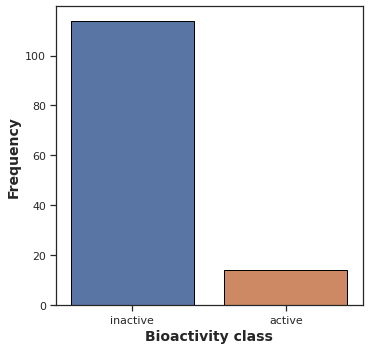

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

Img 2. Bar graph depicting number of active and inactive labeled compounds

##Scatter plot of MW versus LogP

This graph shows the range of values for different discriptors seen in active and inactive compounds. Both compounds span similar chemical spaces. Higher the pIC50, lower is the IC50 value, which can be seen in active compounds that are represented by bigger siize bubbles compared to inactive compounds. Most of the active compounds occupy the first quadrant (bottom left area) in the graph which is expected since low molecular weight and low logP is typical for bioactive compounds.

The following bar graphs analysing individual discriptors further emphasize this.

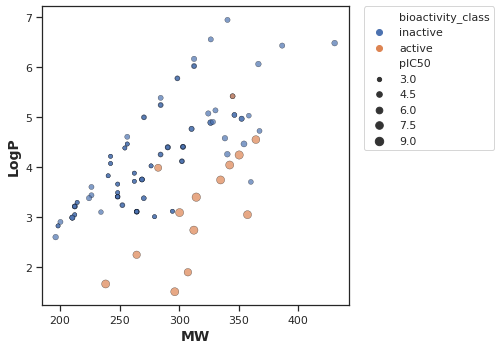

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MolWt', y='LogP', data=df_final, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

Img 3. Scatter plot depicting the molecular discriptor values of active and inactive compounds.

## pIC50 Box Plots

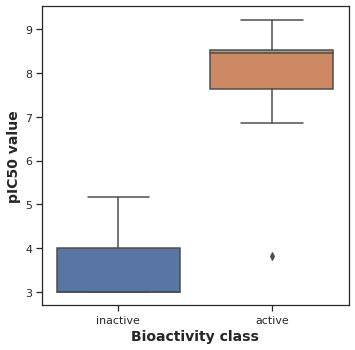

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Img 4. Bar graph representing difference in IC50 values in active vs. inactive classes

##Statistical analysis | Mann-Whitney U Test

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # reference - https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_final[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_final[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')  

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1547.0,1.860713e-09,0.05,Different distribution (reject H0)


p value is lesser than 0.05, reject null hypothesis. Activity in compounds is statistically significant

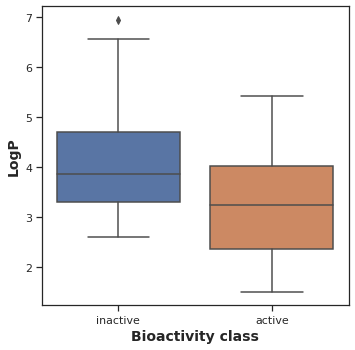

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

Img 5. Bar graph representing difference in LogP values in active vs. inactive classes

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,479.0,0.015004,0.05,Different distribution (reject H0)


p value is lesser than 0.05, reject null hypothesis. Difference in LogP of active vs inactive compounds is statistically significant

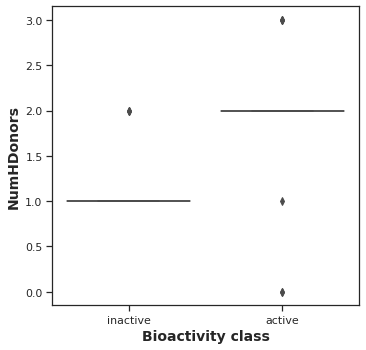

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

Img 6. Bar graph representing difference in Number of H donors values in active vs. inactive classes

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1297.5,3.196225e-11,0.05,Different distribution (reject H0)


p value is lesser than 0.05, reject null hypothesis. Difference in Number of H donors in active vs inactive compounds is statistically significant

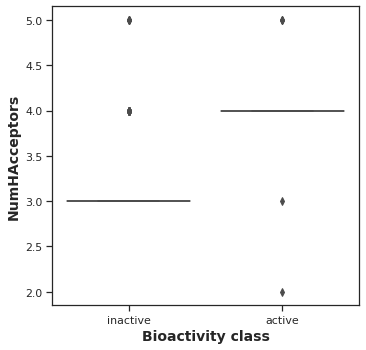

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

Img 7. Bar graph representing difference in Number of H acceptors values in active vs. inactive classes

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1280.0,0.000003,0.05,Different distribution (reject H0)


p value is lesser than 0.05, reject null hypothesis. Difference in Number of H acceptors in active vs inactive compounds is statistically significant

In [ ]:
df_new = df_final.loc[df.bioactivity_class == "active"]
df_new.to_csv(r'active_compounds.csv', index=False)
df_new

,molecule_chembl_id,canonical_smiles,bioactivity_class,MolWt,LogP,NumHDonors,NumHAcceptors,pIC50
118,CHEMBL400279,CC1=C(O)C(C)(Cc2ccc(-c3cccc(Cl)c3)cc2)SC1=O,active,344.863,5.41360,1.0,3.0,3.806875
119,CHEMBL509952,Cc1ccc(S(=O)(=O)c2cc(O)c3ccccc3c2O)cc1,active,314.362,3.39222,2.0,4.0,9.214670
120,CHEMBL491752,CS(=O)(=O)c1cc(O)c2ccccc2c1O,active,238.264,1.65450,2.0,4.0,8.452225
121,CHEMBL455414,O=C(O)CCS(=O)(=O)c1cc(O)c2ccccc2c1O,active,296.300,1.49940,3.0,5.0,8.452225
122,CHEMBL462205,O=S(=O)(c1ccccc1)c1cc(O)c2ccccc2c1O,active,300.335,3.08380,2.0,4.0,8.546682
123,CHEMBL512926,CC(=O)Nc1ccc(S(=O)(=O)c2cc(O)c3ccccc3c2O)cc1,active,357.387,3.04220,3.0,5.0,8.424812
124,CHEMBL460104,O=S(=O)(c1ccc(Cl)cc1)c1cc(O)c2ccccc2c1O,active,334.780,3.73720,2.0,4.0,8.442493
125,CHEMBL445555,CCCc1ccc(S(=O)(=O)c2cc(O)c3ccccc3c2O)cc1,active,342.416,4.03630,2.0,4.0,8.510042
126,CHEMBL462374,O=S(=O)(c1ccc2ccccc2c1)c1cc(O)c2ccccc2c1O,active,350.395,4.23700,2.0,4.0,8.826814
127,CHEMBL451059,Cc1ccc(S(=O)(=O)c2cc(O)c3cc4ccccc4cc3c2O)cc1,active,364.422,4.54542,2.0,4.0,8.072117


#Discussion and Conclusion

###The above discribed bioinformatic tool is built to identify bioactive compounds using molecular discriptors from the ChEMBL database. We perform a Q-SAR (Quantitative structure activity relationship) analysis on our protein target of interest from the pathogenic bacterium *Mycobacterium tuberculosis.* The Lipinski rule of 5, which is a gold standard for determining the pharmacokinetic properties of drugs acts as a guide to establishing criteria that a compound needs to meet to be biologically active.

###Our target protein, 3-oxoacyl-[acyl-carrier-protein] synthase III is critical in the mycolic acid synthesis pathway and its protein crystal structure has also been determined. Here we report 14 compounds that have the required pharmacokinetic properties to be perform well as potential drugs. First a cohort of all possible compounds having activity with our target protein was determined using the ChEMBL web source client. Then data was pre-processed by dropping missing values and classifying drugs into active, inactive and intermediate bioactivity based on the IC50 values also obtained from the ChEMBL database. The lipinksi discriptors were collected for all the drug molecules and dataset was cleaned by only keeping the active and inactive compounds to make analysis easier. Following this exploratory data analysis was performed on the discriptors and data was analysed using box plots and scatter plots depicting information about the discriptors corresponding to the drugs. As expected active compounds had lower molecular weights, LogP values and higher pIC50 compared to their inactive counterparts. the Mann-Whitney U statistical test was used to determine statistical significance of data. This test is useful in small datasets with data that are continous, non-normal and independent of each other as seen with our dataset (McKnight, P. E., & Najab, J. (2010). Mann‐Whitney U Test. The Corsini encyclopedia of psychology, 1-1.). Since the p value for all the tests are very low (<<0.05) we can reject null hypothesis safetly assume that active compounds show significant bioactive properties compared to inactive labeled compounds. These tests validate our data since active compounds already had the expected pharmacokinetic signature desirable for active compounds.

###Any protein target from a model organism present on the ChEMBL database can be added as an input to identify target bioactive compounds. In our case 3-oxoacyl-[acyl-carrier-protein] synthase III is just one of the hundreds of TB target proteins that can be analysed. This makes the above code multifunctional, adaptable and reliable since it also checks whether bioactivity is statistically significant. Shortlisted compounds can further be analysed; since the smiles notation is included in the output dataset it can be used to further determine the PADEL discriptors and molecular fingerprints of the molecules. This collection of data can then be used to build in a random forest regression model to be able to predict activity in a compound based on its discriptors. This would be the future scope of the project. Several other bioinformatic (molecular docking studies)and in-vitro (drug screen assays) experiemnts can be done with this shortlist of compounds, making this a compelling tool to begin identifying potential therapeutic targets.

# Acknowledgment

###I would like to thank Dr. Chanin Nantasenamat for providing the code backbone to run this project.